In [10]:
#Directories for the training, validation, and test splits
train_dir = 'C:/Users/May Phu Paing/OneDrive - KMITL/Desktop/DeepPython/cats_and_dogs_small/train' 
validation_dir ='C:/Users/May Phu Paing/OneDrive - KMITL/Desktop/DeepPython/cats_and_dogs_small/validation'
test_dir = 'C:/Users/May Phu Paing/OneDrive - KMITL/Desktop/DeepPython/cats_and_dogs_small/test' 


# load the dataset 
from tensorflow.keras. preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator  = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator  = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
) 



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [1]:
# convnet for dog cat classification 

from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [3]:
# compile the model 
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [12]:
# train the model
history  = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

C:\Users\May Phu Paing\anaconda3\envs\DL\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 43s 418ms/step - loss: 0.6925 - acc: 0.5170 - val_loss: 0.6644 - val_acc: 0.5910
Epoch 2/30
100/100 [==============================] - 43s 430ms/step - loss: 0.6531 - acc: 0.6065 - val_loss: 0.6627 - val_acc: 0.5820
Epoch 3/30
100/100 [==============================] - 51s 514ms/step - loss: 0.6106 - acc: 0.6620 - val_loss: 0.6032 - val_acc: 0.6690
Epoch 4/30
100/100 [==============================] - 81s 815ms/step - loss: 0.5660 - acc: 0.7015 - val_loss: 0.5840 - val_acc: 0.6840
Epoch 5/30
100/100 [==============================] - 80s 797ms/step - loss: 0.5368 - acc: 0.7275 - val_loss: 0.6133 - val_acc: 0.6620
Epoch 6/30
100/100 [==============================] - 55s 545ms/step - loss: 0.5147 - acc: 0.7490 - val_loss: 0.5654 - val_acc: 0.7090
Epoch 7/30
100/100 [==============================] - 54s 540ms/step - loss: 0.4843 - acc: 0.7730 - val_loss: 0.5778 - val_acc: 0.6920
Epoch 8/30
100/100 [==============================] - 5

In [13]:
#save the trained model
model.save('cats_and_dogs_small_1.h5')

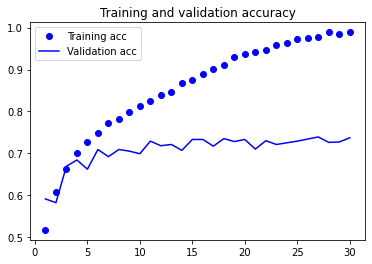

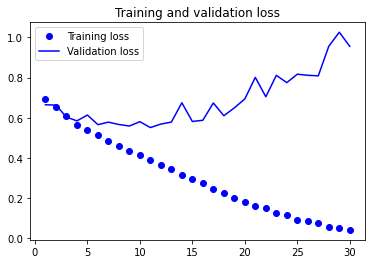

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()